# Numerical Homework 1

Code as follow for problems that require it

#### Original work created on 25/09/2022

#### Author: Terry Cox  



In [1]:
import numpy as np
import pandas as pd

### Problem 3

In [2]:
A = np.matrix([[6, 4, 5, 9, 4, 3],
            [3, 7, 5, 8, 10, 4],
            [8, 8, 5, 7, 9, 5],
            [2, 1, 4, 4, 6, 3],
            [7, 10, 6, 9, 7, 9],
            [2, 8, 6, 6, 6, 2]])

b = np.array([103, 138, 142, 80, 170, 102])

g = b[:3]
h = b[-3:]

C = A[:3,:3]
D = A[:3, -3:]
E = A[-3:, :3]
F = A[-3:, -3:]

I = np.array([[1,0,0],[0,1,0],[0,0,1]])

##### 3a)

In [3]:
# original p
p = np.matmul(A, b)
p

matrix([[3586, 4733, 5238, 2558, 5781, 3866]])

In [4]:
# partitioned p --- p_hat
p_hat = np.zeros(b.shape)
p_hat[:3] = np.matmul(C, g) + np.matmul(D, h)
p_hat[-3:] = np.matmul(E, g) + np.matmul(F, h)
p_hat

array([3586., 4733., 5238., 2558., 5781., 3866.])

In [5]:
p == p_hat

matrix([[ True,  True,  True,  True,  True,  True]])

##### 3b)

In [6]:
# original x
x = np.matmul(np.linalg.inv(A), p.T)
x.T

matrix([[103., 138., 142.,  80., 170., 102.]])

In [7]:
# partitioned x ---- y and z
y = np.matmul(np.linalg.inv(C), (p[0,:3]-np.matmul(D, h)).T)
z = np.matmul(np.linalg.inv(F), (p[0,-3:]-np.matmul(E, g)).T)
y, z

(matrix([[103.],
         [138.],
         [142.]]),
 matrix([[ 80.],
         [170.],
         [102.]]))

### Problem 4

##### 4b)

In [8]:


def GEM_step(A, b):
    operations = 0
    A_temp = A.copy()
    b_temp = b.copy()
    for i in range(1, A.shape[0]):
        #print(A)
        for j in range(0, A.shape[1]):
            A_temp[i,j] = A[i,j] - A[i,0]/A[0,0] * A[0,j]
            operations +=1
        b_temp[i] = b[i] - A[i,0]/A[0,0] * b[0]
        operations +=1
    return A_temp, b_temp, operations

def back_substitute(A,b):
    n = len(b)
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        temp = b[i]
        for j in range(n-1, i, -1):
            temp -= x[j]*A[i,j]

        x[i] = temp/A[i,i]
    return x

def GEM(A, b):
    o = 0
    for i in range(A.shape[0]-1):
        A_step, b_step, operations = GEM_step(A[i:,i:], b[i:])
        A[i:,i:] = A_step
        b[i:] = b_step
        o += operations
        #print(i, A, b)
    x = back_substitute(A,b)
    return A, b, x, o



In [9]:
def build_A_and_b(n):
    A = np.zeros((n,n))
    b = np.zeros(n)
    s = 0
    for i in range(n):
        for j in range(n):
            A[i,j] = 1/(i+1 +j+1 -1)
            s += A[i,j]
        b[i] = s
        s = 0
        
    return A, b


In [10]:
xs = {n : None for n in [5,8,10,12,15]}
os = xs.copy()
for n in xs.keys():
    A, b, x, o = GEM(*build_A_and_b(n))
    xs[n] = x
    os[n] = o
xs

{5: array([1., 1., 1., 1., 1.]),
 8: array([1.        , 1.        , 0.99999998, 1.00000013, 0.99999966,
        1.00000049, 0.99999965, 1.0000001 ]),
 10: array([1.        , 1.00000011, 0.99999774, 1.00002048, 0.99990264,
        1.00026691, 0.99956309, 1.0004214 , 0.99977914, 1.0000485 ]),
 12: array([0.99999998, 1.00000272, 0.99991614, 1.00112492, 0.99185897,
        1.03538471, 0.90231481, 1.17541948, 0.79576776, 1.14866257,
        0.93852547, 1.01102248]),
 15: array([ 0.99999997,  1.00000242,  0.99999492,  0.99864026,  1.02566811,
         0.78193349,  2.06684093, -2.2790367 ,  7.53239313, -7.35504757,
         7.38066706, -1.12904142,  0.42574875,  1.73328423,  0.81795234])}

##### 4c)

In [11]:
for n in xs.keys():
    A, b = build_A_and_b(n)
    dist_p = 1/(np.linalg.norm(A, 1)*np.linalg.norm(np.linalg.inv(A), 1))
    print(n, dist_p)

5 1.0597081987512313e-06
8 2.9522222003903674e-11
10 2.8286183568254468e-14
12 2.550908719679527e-17
15 9.144065894767732e-19


As the size of n increases, the relative distance of the matrix $A_{n,n}$ decreases towards 0 rappedly

##### 4d)

In [12]:
error_l2_norm = {}
for n in xs.keys():
    error_l2_norm[n] = np.linalg.norm(np.ones(len(xs[n]))-xs[n], 2)
    
error_l2_norm

{5: 3.4726644211552867e-12,
 8: 7.08726214592578e-07,
 10: 0.0007076326965799963,
 12: 0.3306750623968309,
 15: 13.06000635092709}

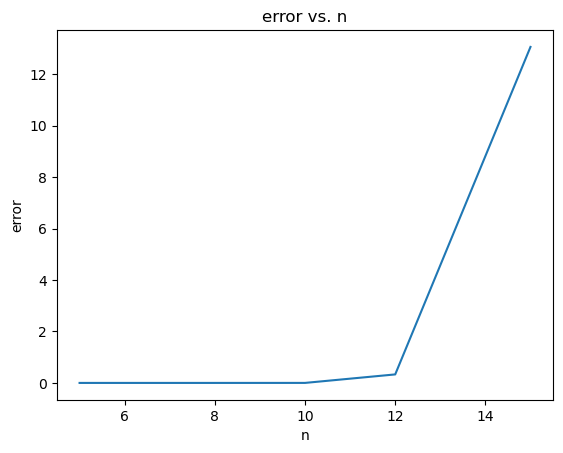

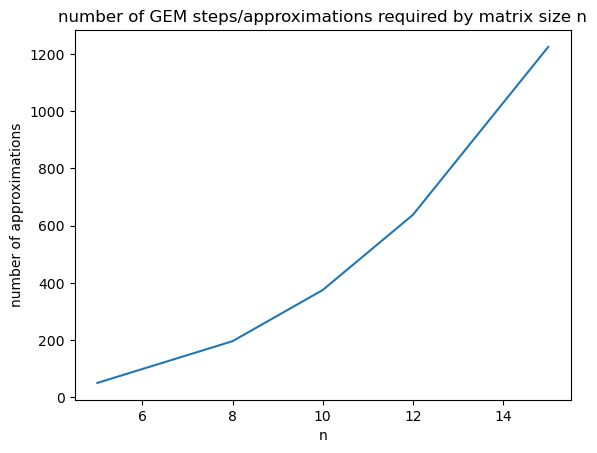

In [13]:
import matplotlib.pyplot as plt
plt.plot(error_l2_norm.keys(), error_l2_norm.values())
plt.xlabel('n')
plt.ylabel('error')
plt.title('error vs. n')
plt.show()

plt.plot(os.keys(), os.values())
plt.xlabel('n')
plt.ylabel('number of approximations')
plt.title('number of GEM steps/approximations required by matrix size n')
plt.show()

As the size of the matrix increases, the error increases what appears to be exponentially.  I would say the reason for this has to do with the number of variables we are working with, which would mean we are approximating more variables.  These approximations are happening by a factor of $O(x^3)$ for the number of approximations happening using GEM.  The number of GEM estimations by matrix size $A_{n,n}$ can be seen in the figure above as it appears to be increasing at $x^3$. 